In [1]:
import pandas as pd
import joblib

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
file_path = '../data/original.xlsx' 
df = pd.read_excel(file_path)

In [4]:
X = df[['x1', 'x2', 'x3', 'x4']]
y = df['ans']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

joblib.dump(model, 'random_forest_model.pkl')

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [7]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 55.458242814885175
R-squared: 0.008447582805381826


In [8]:
comparision_df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
print(comparision_df)

    Actual  Predicted
27   71.21  71.198693
15   79.85  74.823445
23   76.16  71.764699
17   59.12  71.379511
8    61.30  53.457000
9    66.80  58.061800


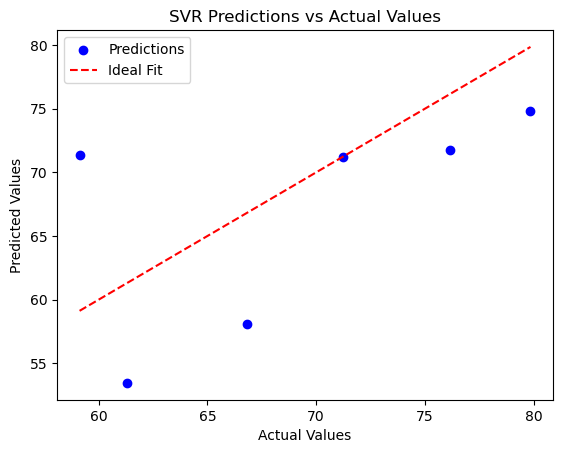

In [9]:
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR Predictions vs Actual Values')
plt.legend()
plt.show()